In [212]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, explained_variance_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

In [213]:
df=pd.read_csv("D:\\Documents2\\python folder\\DAI_regression_assignment\\tips (data for regression problem).csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


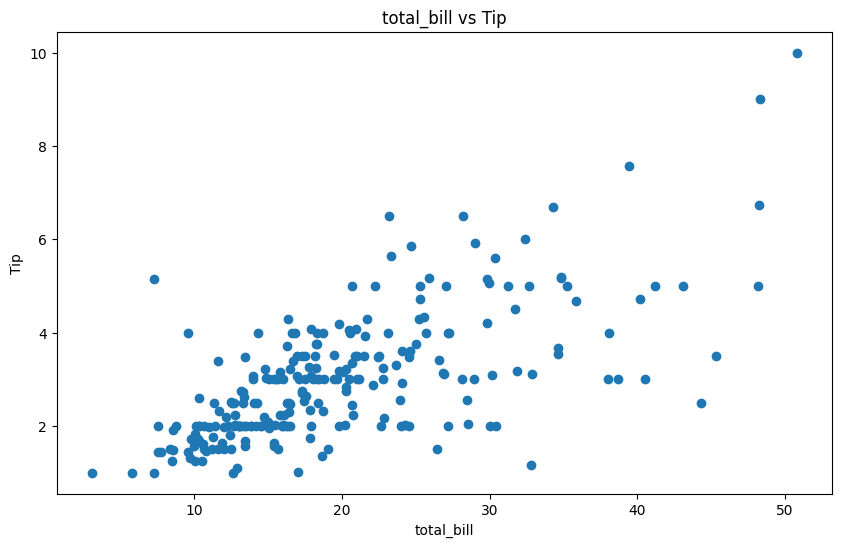

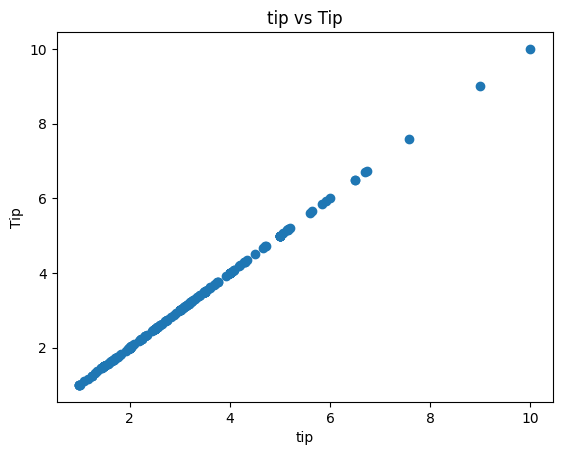

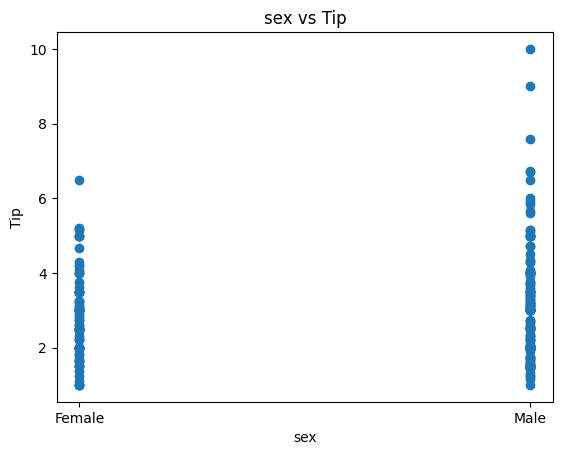

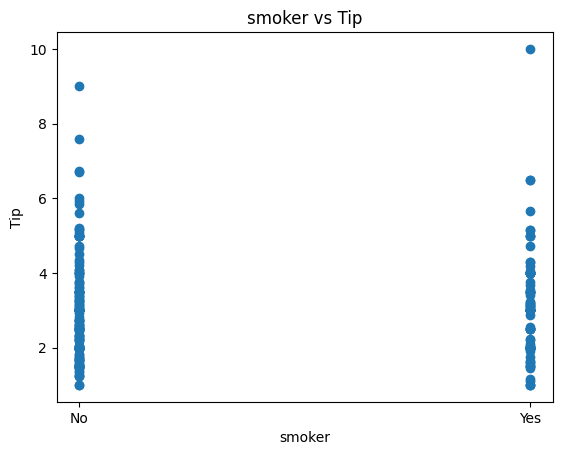

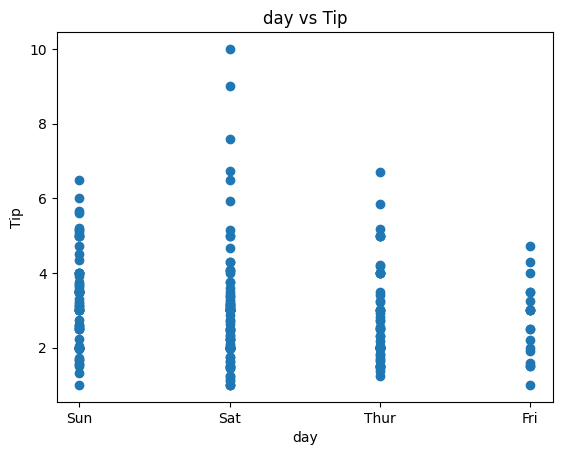

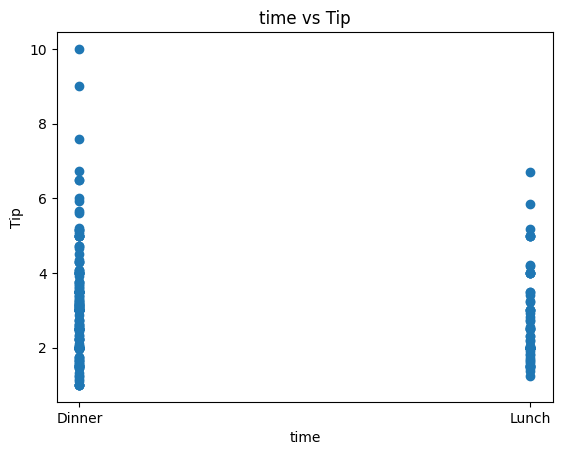

In [214]:
plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df.iloc[:,i], df['tip'])
    plt.xlabel(df.columns[i])
    plt.ylabel('Tip')
    plt.title(df.columns[i] + ' vs Tip')
    plt.show()

<Figure size 1000x600 with 0 Axes>

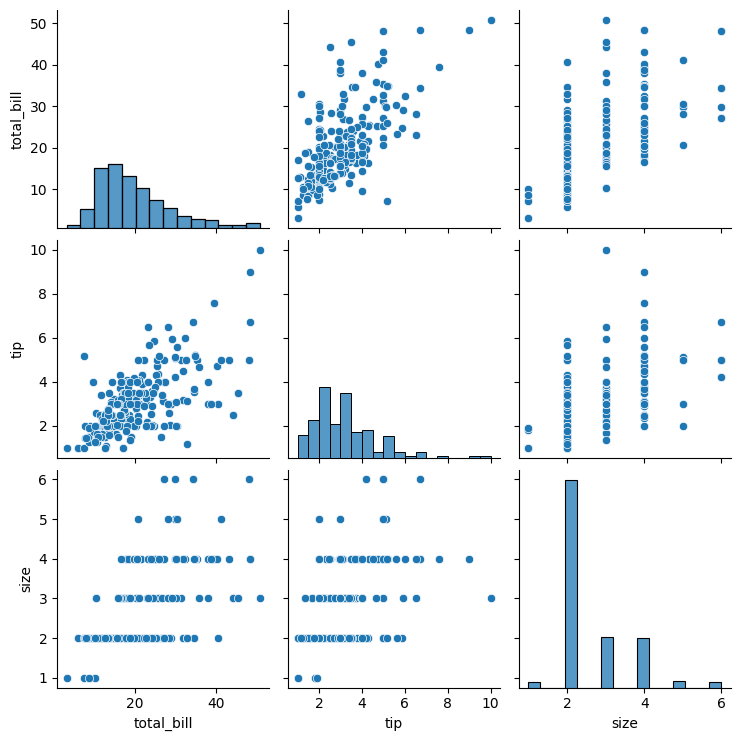

In [215]:
plt.figure(figsize=(10, 6))
sns.pairplot(df)

In [216]:
data=df.drop(columns=['tip'])
target=df['tip']

<Axes: >

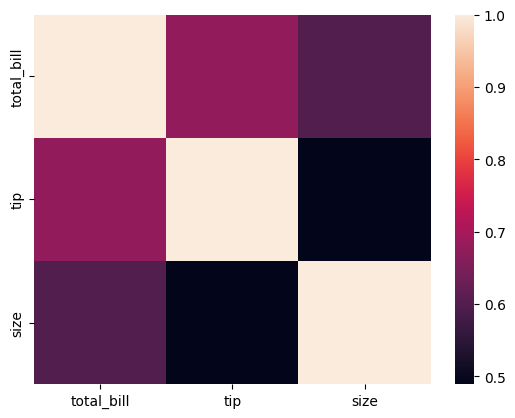

In [217]:
corr=df[['total_bill','tip','size']].corr()
sns.heatmap(corr)

In [218]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['day'] = label_encoder.fit_transform(data['day'])
data['time'] = label_encoder.fit_transform(data['time'])

In [219]:
tips_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

X = tips_encoded.drop(columns='tip')
y = tips_encoded['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)


mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
explained_variance_score_lr = explained_variance_score(y_test, y_pred_lr)

print("Linear Regression \nMSE:", mse_lr, "\nR^2:", r2_lr, "\nexplained_variance_score:", explained_variance_score_lr)

Linear Regression 
MSE: 0.7033566017436105 
R^2: 0.43730181943482505 
explained_variance_score: 0.4807487966265108


In [221]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
explained_variance_score_ridge = explained_variance_score(y_test, y_pred_ridge)

print("Ridge Regression \nMSE:", mse_ridge, "\nR^2:", r2_ridge, "\nexplained_variance_score:", explained_variance_score_ridge)

Ridge Regression 
MSE: 0.7007477213216073 
R^2: 0.4393889716178486 
explained_variance_score: 0.4834090357816272


In [222]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
explained_variance_score_lasso = explained_variance_score(y_test, y_pred_lasso)

print("Lasso Regression \nMSE:", mse_lasso, "\nR^2:", r2_lasso, "\nexplained_variance_score:", explained_variance_score_lasso)

Lasso Regression 
MSE: 0.5908528649971524 
R^2: 0.5273068720881755 
explained_variance_score: 0.5696925632901239


In [223]:
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
explained_variance_score_tree = explained_variance_score(y_test, y_pred_tree)

print("Decision Tree \nMSE:", mse_tree, "\nR^2:", r2_tree, "\nexplained_variance_score:", explained_variance_score_tree)

Decision Tree 
MSE: 1.2551938775510205 
R^2: -0.004178121600921791 
explained_variance_score: 0.019726099843621503


In [224]:
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)


mse_forest = mean_squared_error(y_test, y_pred_forest)
explained_variance_score_forest = explained_variance_score(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
print("Random Forest \nMSE:", mse_forest, "\nR^2:", r2_forest,"\nexplained_variance_score:", explained_variance_score_forest)

Random Forest 
MSE: 0.9196720148979602 
R^2: 0.2642455218065466 
explained_variance_score: 0.3312782440193873


In [225]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)


mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
explained_variance_score_svr = explained_variance_score(y_test, y_pred_forest)

print("Support Vector Regression \nMSE:", mse_svr, "\nR^2:", r2_svr, "\nexplained_variance_score:", explained_variance_score_svr)

Support Vector Regression 
MSE: 0.6524534436627769 
R^2: 0.47802527943520123 
explained_variance_score: 0.3312782440193873


In [226]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
explained_variance_score_knn = explained_variance_score(y_test, y_pred_knn)

print("K-Nearest Neighbors \nMSE:", mse_knn, "\nR^2:", r2_knn, "\nexplained_variance_score:", explained_variance_score_knn)

K-Nearest Neighbors 
MSE: 0.8763725714285714 
R^2: 0.29888587066985495 
explained_variance_score: 0.32126852987083876


According to above analysis, Lasso regression looks the best fit.

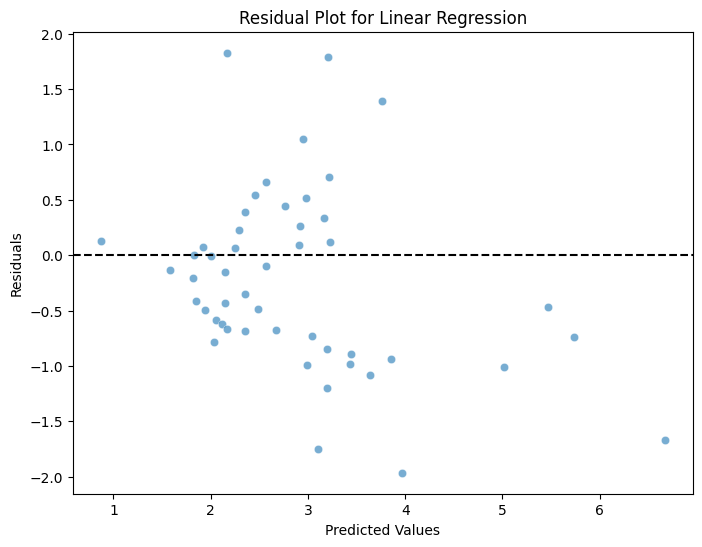

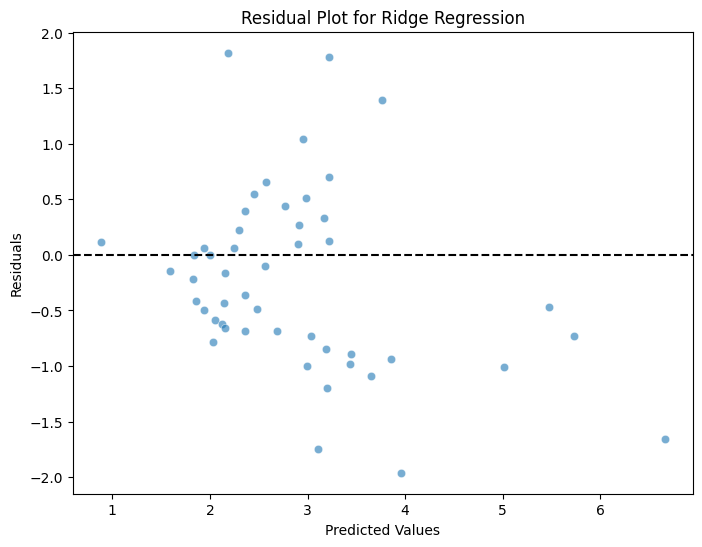

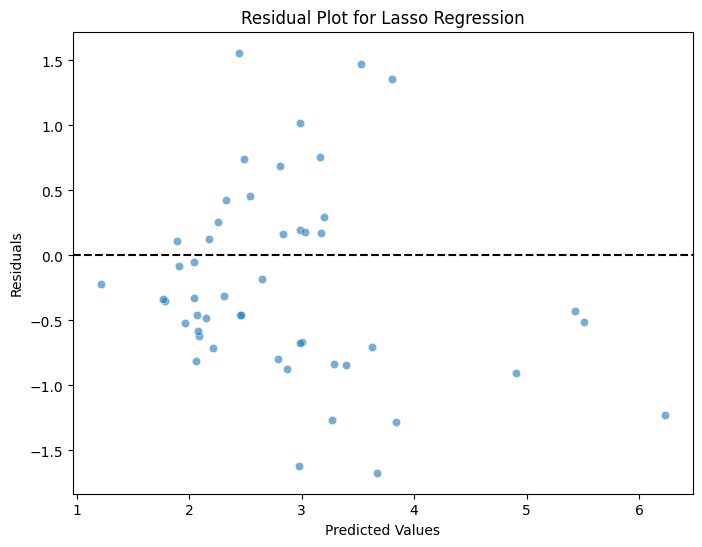

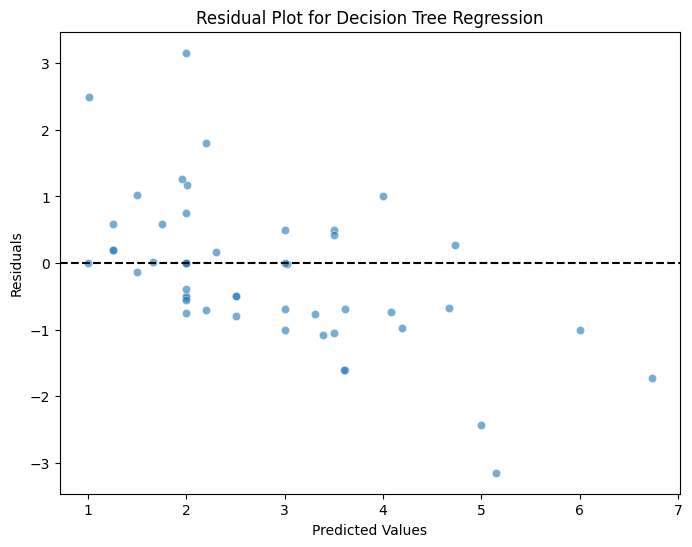

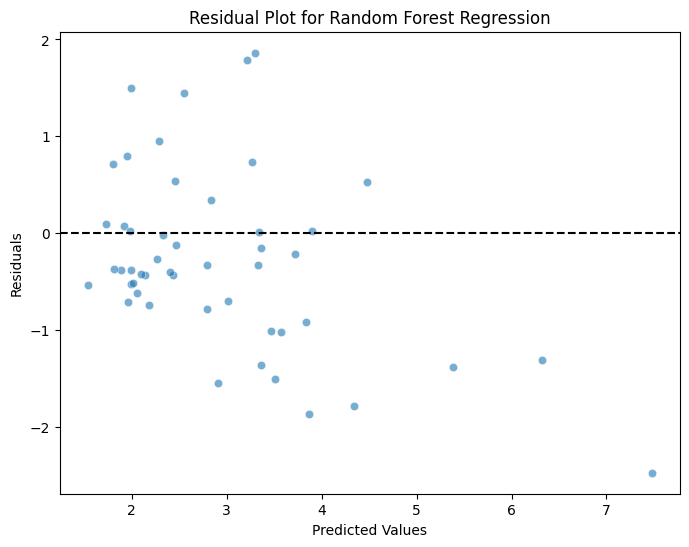

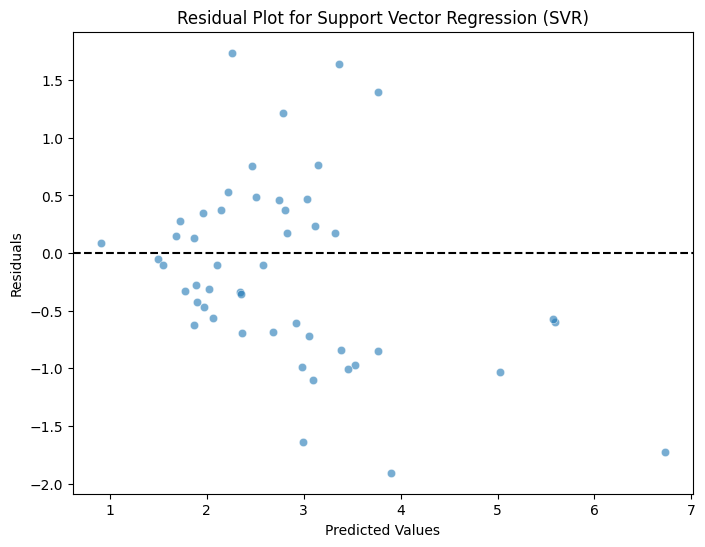

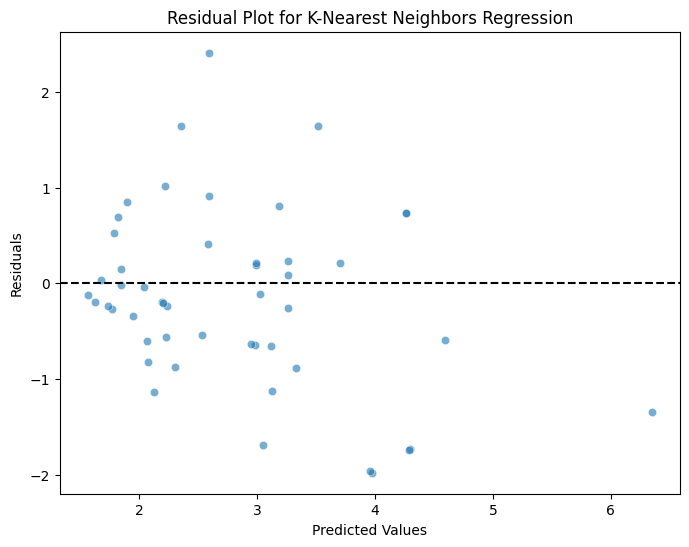

In [227]:
# residual plots
def plotter(y_test, y_pred, model):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='black', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residual Plot for {model}")
    plt.show

plotter(y_test, y_pred_lr, "Linear Regression")
plotter(y_test, y_pred_ridge, "Ridge Regression")
plotter(y_test, y_pred_lasso, "Lasso Regression")
plotter(y_test, y_pred_tree, "Decision Tree Regression")
plotter(y_test, y_pred_forest, "Random Forest Regression")
plotter(y_test, y_pred_svr, "Support Vector Regression (SVR)")
plotter(y_test, y_pred_knn, "K-Nearest Neighbors Regression")



Conclusions:

1) There is a high correlation of size and total bill with tip_amount, which means restaurant should focus more on the tables that have high no of people and customers with high total bill.
2) Restaurant should focus more on dinner time as it has higher tip on average than lunch.
3) Men generally pay higher tip which shoukd be kept in mind.
4) Sundays are the most profitable days so there should be special arrangements for customers on sundays.
